<a href="https://colab.research.google.com/github/tushant-akar/CS367-Artifical-Intelligence-Lab/blob/main/Eight_rook_Problem_(Lab_6_Problem_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import numpy as np
import matplotlib.pyplot as plt

N = 8
iterations = 10000

In [71]:
def activation(x, threshold = 0, steepness = 4):
    return 1 / (1 + np.exp(-steepness * (x - threshold)))

In [72]:
def energy(state_matrix):
    row_conflicts = sum(np.sum(state_matrix, axis=1) - 1)
    col_conflicts = sum(np.sum(state_matrix, axis=0) - 1)
    total_conflicts = row_conflicts + col_conflicts
    return total_conflicts

In [73]:
def enforce_constraints(state):
    state_matrix = state.reshape((N, N))
    for i in range(N):
        if np.sum(state_matrix[i]) != 1:
            state_matrix[i] = 0
            state_matrix[i, np.random.randint(N)] = 1
    for j in range(N):
        if np.sum(state_matrix[:, j]) != 1:
            state_matrix[:, j] = 0
            state_matrix[np.random.randint(N), j] = 1
    return state_matrix.flatten()

In [74]:
def is_valid_solution(state_matrix):
    return all(np.sum(state_matrix, axis=1) == 1) and all(np.sum(state_matrix, axis=0) == 1)

In [75]:
def plot_solution(state_matrix, energy_value, valid):
    plt.figure(figsize=(8, 8))
    for i in range(N):
        for j in range(N):
            color = 'white' if (i + j) % 2 == 0 else 'gray'
            plt.gca().add_patch(plt.Rectangle((j, N - i - 1), 1, 1, color=color))
            if state_matrix[i, j] == 1:
                plt.text(j + 0.5, N - i - 1 + 0.5, '♖', fontsize=24, ha='center', va='center', color='black')

    plt.xlim(0, N)
    plt.ylim(0, N)
    plt.xticks([])
    plt.yticks([])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Eight-Rook Problem Solution\nEnergy: {energy_value:.2f} | Valid: {valid}", fontsize=16, color='green' if valid else 'red')
    plt.show()

In [80]:
def hopfield_network(N, iterations=10000, threshold = 0, steepness = 2):
    state = np.zeros(N**2)
    for i in range(N):
        state[i * N + np.random.randint(N)] = 1
    state = enforce_constraints(state)

    best_state = state.copy()
    state_matrix = state.reshape((N, N))
    best_energy = energy(state_matrix)

    for _ in range(iterations):
        for neuron in np.random.permutation(N**2):
            input_sum = np.sum(state_matrix, axis=1)[neuron // N] + np.sum(state_matrix, axis=0)[neuron % N]
            probability = activation(input_sum - 1, threshold=threshold, steepness=steepness)
            state[neuron] = 1 if np.random.rand() < probability else 0

        state = enforce_constraints(state)
        state_matrix = state.reshape((N, N))
        current_energy = energy(state_matrix)

        if current_energy < best_energy:
            best_energy = current_energy
            best_state = state.copy()

        if is_valid_solution(state_matrix):
            return state_matrix, best_energy

    return best_state.reshape((N, N)), best_energy

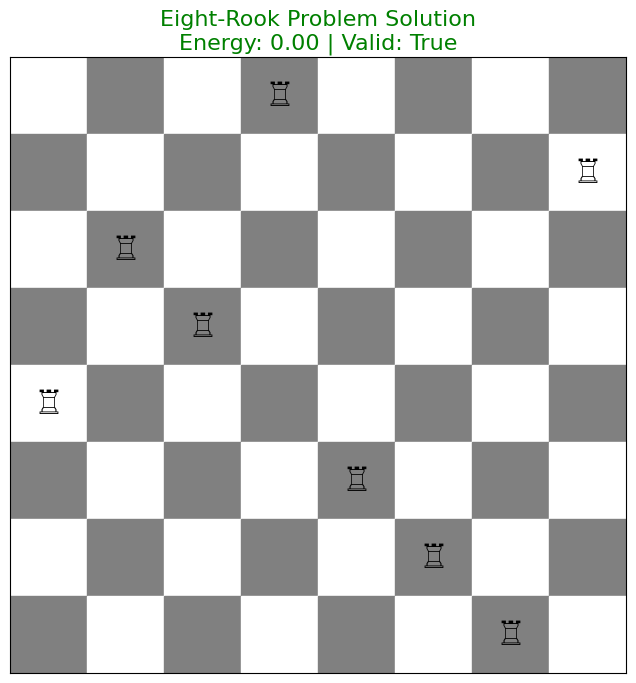

In [81]:
solution, solution_energy = hopfield_network(N, iterations)

valid_solution = is_valid_solution(solution)
plot_solution(solution, solution_energy, valid_solution)